In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
df = pd.read_csv('Fantasy-Premier-League/data/2024-25/cleaned_players.csv', index_col=0)
train = df.copy(deep=True)  # Deepcopy of dataset
print(train.head())

                     second_name  goals_scored  assists  total_points  \
first_name                                                              
Fábio            Ferreira Vieira             0        0             0   
Gabriel        Fernando de Jesus             0        0             0   
Gabriel     dos Santos Magalhães             0        0            14   
Kai                      Havertz             2        1            22   
Karl                        Hein             0        0             0   

            minutes  goals_conceded  creativity  influence  threat  bonus  \
first_name                                                                  
Fábio             0               0         0.0        0.0     0.0      0   
Gabriel           5               0         0.8        0.2     0.0      0   
Gabriel         270               1        24.1       56.0    17.0      1   
Kai             270               1        55.0      101.8    91.0      5   
Karl              0       

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, Fábio to Carlos Roberto
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second_name          655 non-null    object 
 1   goals_scored         655 non-null    int64  
 2   assists              655 non-null    int64  
 3   total_points         655 non-null    int64  
 4   minutes              655 non-null    int64  
 5   goals_conceded       655 non-null    int64  
 6   creativity           655 non-null    float64
 7   influence            655 non-null    float64
 8   threat               655 non-null    float64
 9   bonus                655 non-null    int64  
 10  bps                  655 non-null    int64  
 11  ict_index            655 non-null    float64
 12  clean_sheets         655 non-null    int64  
 13  red_cards            655 non-null    int64  
 14  yellow_cards         655 non-null    int64  
 15  selected_by_percent  655 non-n

In [28]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 


In [20]:
features = ['goals_scored', 'assists', 'minutes', 'goals_conceded', 
            'creativity', 'influence', 'threat', 'bonus', 'bps', 
            'ict_index', 'clean_sheets', 'red_cards', 'yellow_cards',
            'selected_by_percent']
X = train[features] 
y = train['total_points'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
regr = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_features = 4)

regr.fit(X_train, y_train)
predict_train = regr.predict(X_train)
predict_test = regr.predict(X_test)
out_of_bag_predict = regr.oob_score


In [22]:
print("Model R^2 score on test data:", regr.score(X_test, y_test))

Model R^2 score on test data: 0.9369203509879772


In [33]:
residuals = predict_train - y_train
residuals2 = predict_test - y_test
residuals3 = out_of_bag_predict - y_train
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
mse_out_of_bag = np.sqrt(sum(residuals3**2)/len(residuals3))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)
abs_out_of_bag = sum(abs(residuals3))/len(residuals3)



In [34]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  0.5108758861792458
sqrt(MSE) on test set:  1.411030885039936
Mean Absolute value of residuals on train set:  0.2434786150712831
Mean Absolute value of residuals on test set:  0.6606829268292682


In [35]:
importances = regr.feature_importances_

Text(0.5, 0, 'Average decrease in MSE')

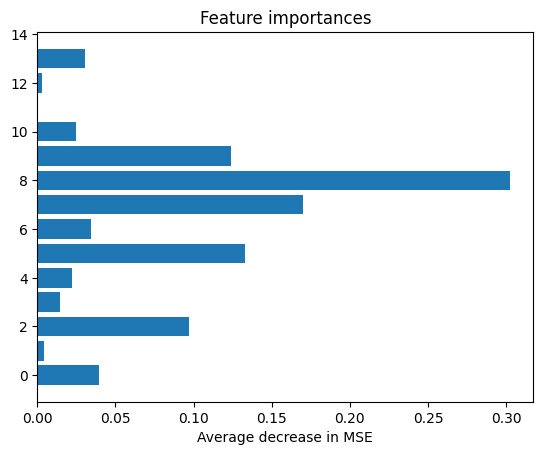

In [37]:
plt.figure()
plt.title("Feature importances")
ax = plt.barh(range(len(X_train.columns)),importances,align="center")
plt.xlabel('Average decrease in MSE')

Text(0.5, 0, 'Average decrease in MSE')

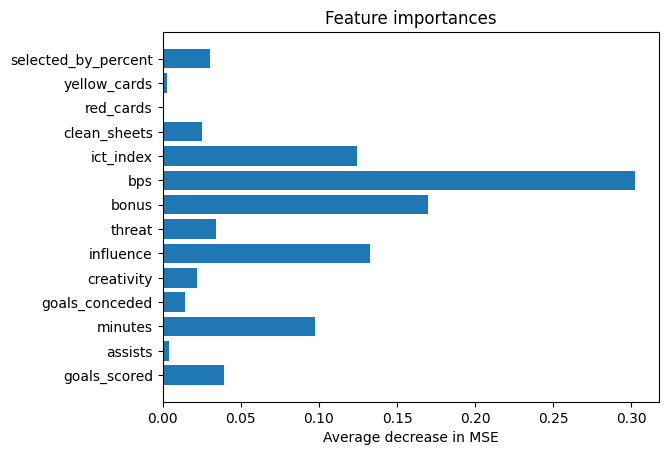

In [41]:
plt.figure()
plt.title("Feature importances")
ax = plt.barh(list(X_train.columns)[:20],importances[:20],align="center")
plt.xlabel('Average decrease in MSE')

In [42]:
### Using cross-validation to find the optimal number of randomly sampled variables from which to find the optimal split at each node

features = [1, 2, 5, 9, 14] # 14 total features, incracments of n-1 - n-2 + 1 starting at i=1
n = len(features)
mse_train = [math.nan for i in range(n)]
mse_test = [math.nan for i in range(n)]
mse_out_of_bag = [math.nan for i in range(n)]
abs_train = [math.nan for i in range(n)]
abs_test = [math.nan for i in range(n)]
abs_out_of_bag = [math.nan for i in range(n)]

for i in range(n):
    Forest = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_features = features[i])
    Forest.fit(X_train, y_train)
    
    predict_train = Forest.predict(X_train)

    predict_test = Forest.predict(X_test)

    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    residuals3 = out_of_bag_predict - y_train
    mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
    mse_out_of_bag[i] = np.sqrt(sum(residuals3**2)/len(residuals3))
    abs_train[i] = sum(abs(residuals))/len(residuals)
    abs_test[i] = sum(abs(residuals2))/len(residuals2)
    abs_out_of_bag[i] = sum(abs(residuals3))/len(residuals3)